In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
dataset = pd.read_csv('train_HP.csv')

In [211]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Verificacion de NaN

In [212]:
def getNanColNames(df):
    colnames=dataset.columns
    cols_con_na=[]
    for col in colnames:
        if(dataset[col].isnull().sum()>0):
            cols_con_na.append(col)
    return cols_con_na

In [213]:
cols_con_nan=getNanColNames(dataset)
cols_con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [214]:
dataset[cols_con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [215]:
dataset[cols_con_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [216]:
def getNanGoodCols(df,rate=0.2):
    cols_procesables=[]
    for col in df.columns:
        if((df[col].isnull().mean()<rate)):
           cols_procesables.append(col)
    return cols_procesables

In [217]:
cols_cca=getNanGoodCols(dataset,0.05)
cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [218]:
dataset_temp=dataset[cols_cca].dropna()

In [219]:
dataset_temp.shape, dataset.shape
##dataset=dataset[cols_cca].dropna()

((1412, 70), (1460, 81))

## Imputación de medias, medianas y sin nan

<AxesSubplot:ylabel='Density'>

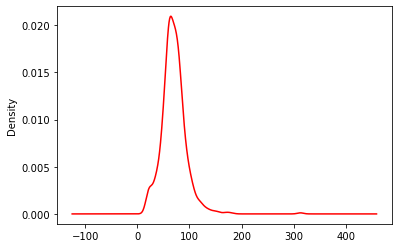

In [220]:
dataset['LotFrontage'].plot.density(color="red")

In [221]:
meanValue=np.round(dataset['LotFrontage'].mean(),0)
medianValue=dataset['LotFrontage'].median()
meanValue, medianValue

(70.0, 69.0)

In [222]:
dataset_LF_meanImpo=dataset['LotFrontage'].fillna(meanValue)
dataset_LF_medianImpo=dataset['LotFrontage'].fillna(medianValue)

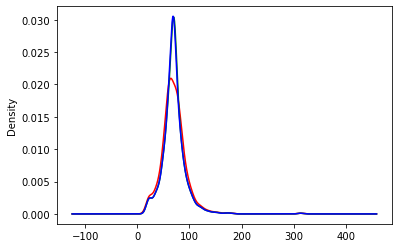

In [223]:
fig=plt.figure()
fig.add_subplot(111)

dataset['LotFrontage'].plot.density(color="red")
dataset_LF_meanImpo.plot.density(color="green")
dataset_LF_medianImpo.plot.density(color="blue")
plt.show()

In [224]:
dataset['LotFrontage']=dataset['LotFrontage'].fillna(meanValue)

In [225]:
np.corrcoef(dataset['LotFrontage'],dataset['SalePrice'])

array([[1.        , 0.33489718],
       [0.33489718, 1.        ]])

## Imputación de categorias faltantes

In [226]:
dataset_cat_missing=dataset[['BsmtQual','FireplaceQu','SalePrice']]

In [227]:
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [228]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [229]:
dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

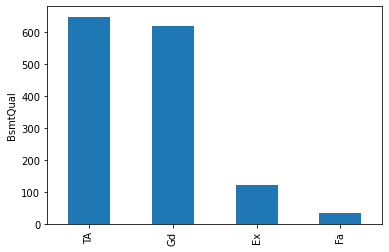

In [230]:
dataset_cat_missing['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de casas")
plt.ylabel("BsmtQual")
plt.show()

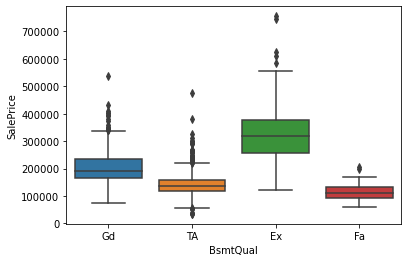

In [231]:
import seaborn as sns
sales=dataset_cat_missing['SalePrice']
bsq=dataset_cat_missing['BsmtQual']
sns.boxplot(x=bsq,y=sales)
plt.show()

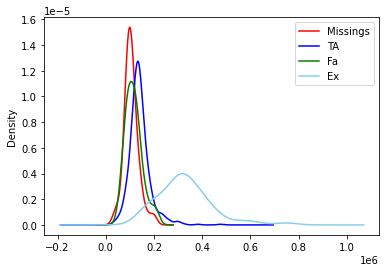

In [232]:
fig=plt.figure()
ax=fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Fa']['SalePrice'].plot(kind="kde",color="green",label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtQual']=='Ex']['SalePrice'].plot(kind="kde",color="skyblue",label="Ex")
ax.legend()
plt.show()

In [233]:
dataset['BsmtQual'].fillna('TA',inplace=True)

##Con la columna fireplace

In [234]:
dataset_cat_missing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

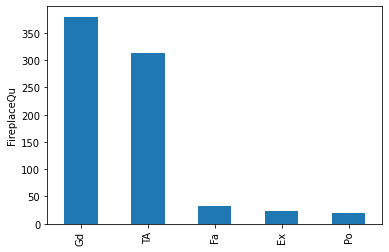

In [235]:
dataset_cat_missing['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de casas")
plt.ylabel("FireplaceQu")
plt.show()

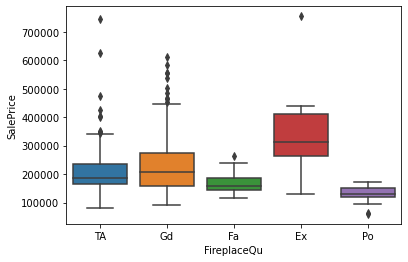

In [236]:
import seaborn as sns
sales=dataset_cat_missing['SalePrice']
bsq=dataset_cat_missing['FireplaceQu']
sns.boxplot(x=bsq,y=sales)
plt.show()

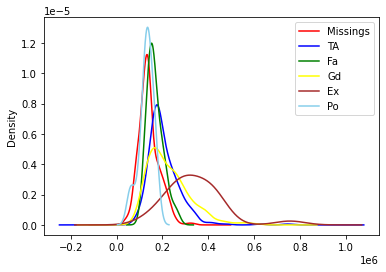

In [237]:
fig=plt.figure()
ax=fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde",color="red",label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='TA']['SalePrice'].plot(kind="kde",color="blue",label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Fa']['SalePrice'].plot(kind="kde",color="green",label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Gd']['SalePrice'].plot(kind="kde",color="yellow",label="Gd")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Ex']['SalePrice'].plot(kind="kde",color="brown",label="Ex")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']=='Po']['SalePrice'].plot(kind="kde",color="skyblue",label="Po")
ax.legend()
plt.show()

In [238]:
dataset['FireplaceQu'].fillna('Missing',inplace=True)

## Codificación de variable Categoricas

In [239]:
def getCategoryVars(df):
    colnames=dataset.columns
    cat_cols=[]
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_cols.append(col)
    return cat_cols

In [240]:
cat_cols=getCategoryVars(dataset)

In [241]:
cat_cols.append('SalePrice')

In [242]:
dataset_categorics=dataset[cat_cols]

In [243]:
dataset_categorics.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [244]:
dataset_cat=dataset[['MSZoning','SalePrice']]

In [245]:
dataset_cat.head()

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000


In [246]:
dataset_cat['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### One Hot Encoding

In [247]:
pd.get_dummies(dataset_cat['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


#### Frequency Encoding

In [248]:
dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

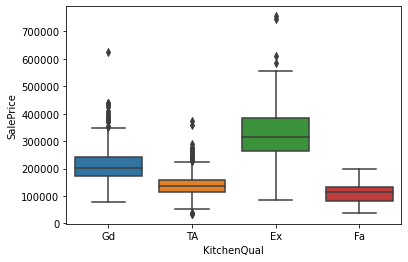

In [249]:
sales=dataset_categorics['SalePrice']
ktq=dataset_categorics['KitchenQual']
sns.boxplot(x=ktq,y=sales)
plt.show()

In [250]:
freq_mapper=(dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [251]:
dataset_categorics['KitchenQual']=dataset_categorics['KitchenQual'].map(freq_mapper)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9512/1439019326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorics['KitchenQual']=dataset_categorics['KitchenQual'].map(freq_mapper)


In [252]:
density_mapper=(dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)/len(dataset_categorics['KitchenQual'])).to_dict()
density_mapper

{735: 0.5034246575342466,
 586: 0.40136986301369865,
 100: 0.0684931506849315,
 39: 0.02671232876712329}

In [253]:
def executeFreqEncoding(df,map_type='freq'):
    colnames=df.columns
    for col in colnames:
        if(df[col].dtype=='object'):
            factor_div=1 if (map_type=='freq') else len(df[col])
            mapper=(df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col]=df[col].map(mapper)

In [254]:
dataset_temp=dataset

In [255]:
executeFreqEncoding(dataset_temp)

In [256]:
dataset_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,208500
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,181500
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,223500
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2006,1267.0,101.0,140000
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,175000
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,210000
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,266500
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,142125


## Transformación de variables numericas

In [257]:
import scipy.stats as stats

In [258]:
def getContinuesCols(df):
    colnames=df.columns
    numeric_continues_vars=[]
    for col in colnames:
        unique_values=len(df[col].unique())
        if((df[col].dtype!="object")and(unique_values>30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [259]:
numeric_cont_vars=getContinuesCols(dataset)

In [260]:
def plot_density_variable(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()
    

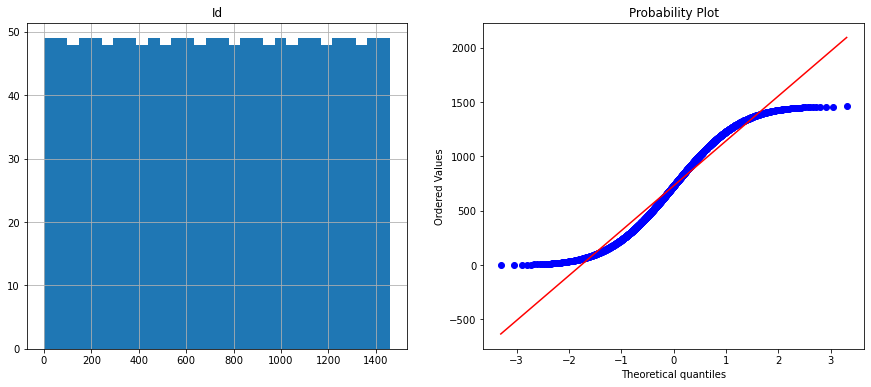

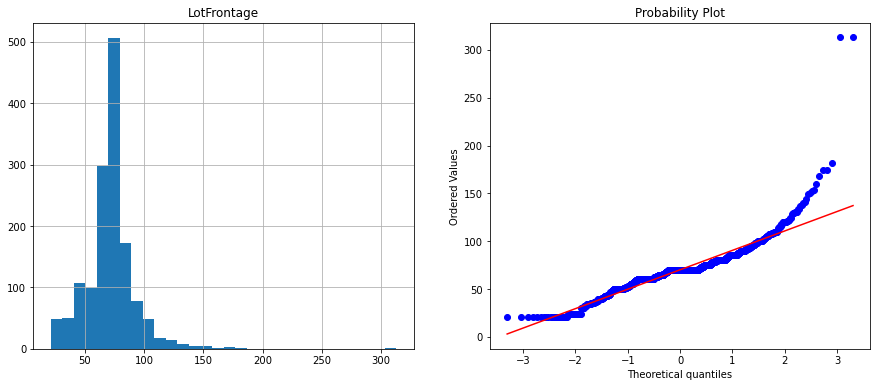

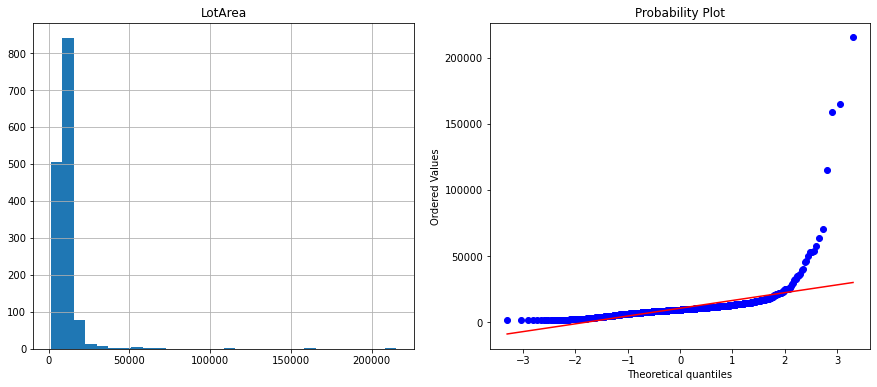

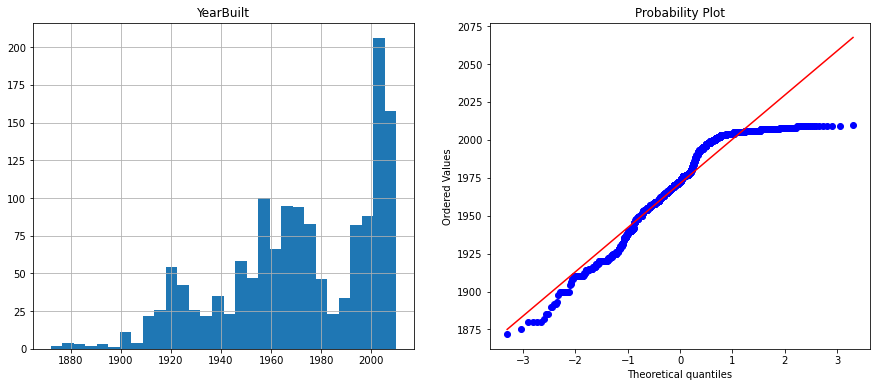

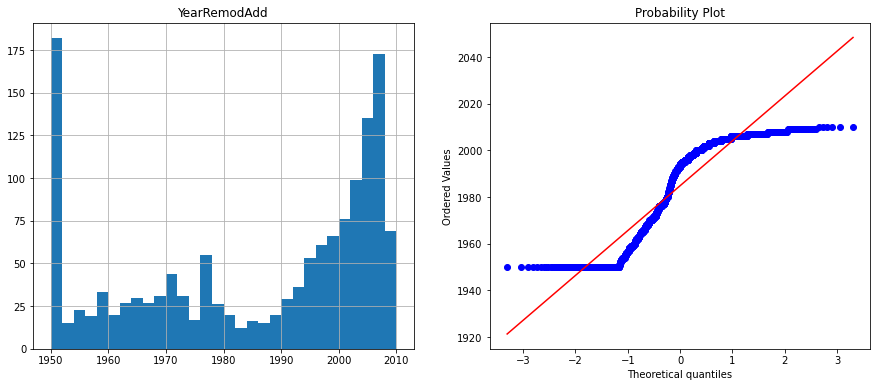

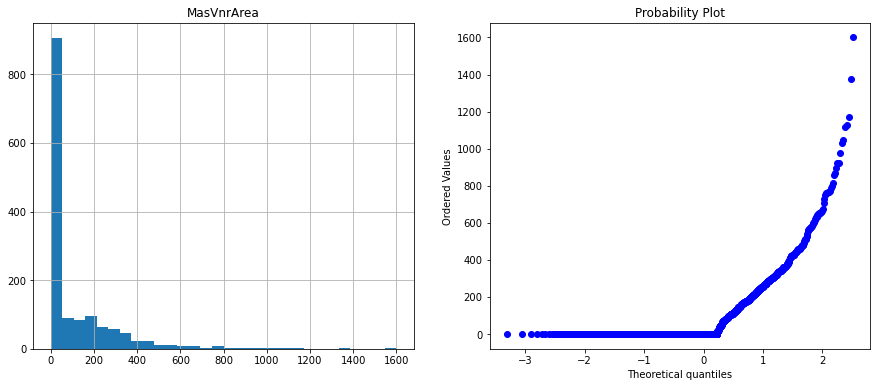

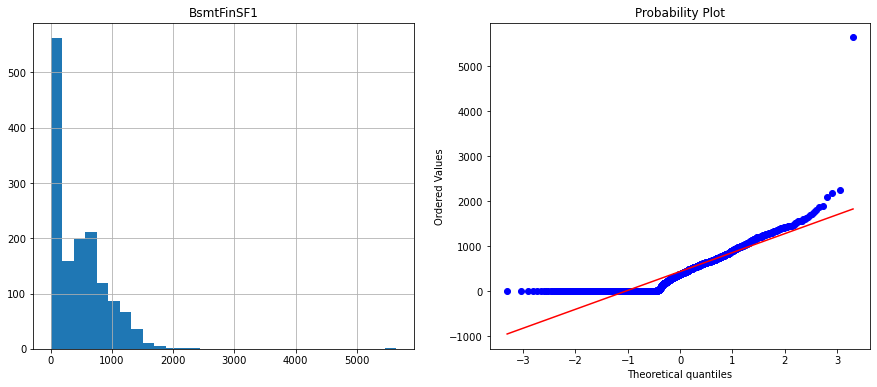

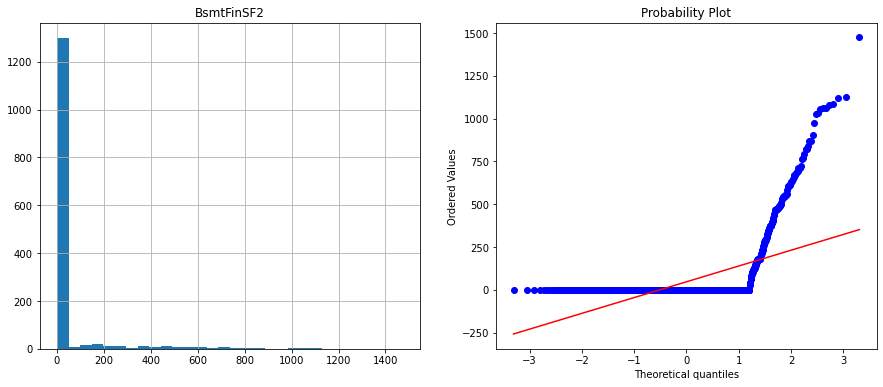

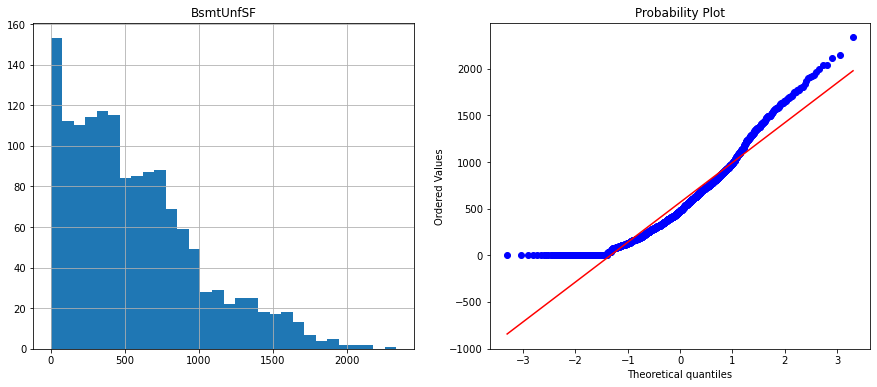

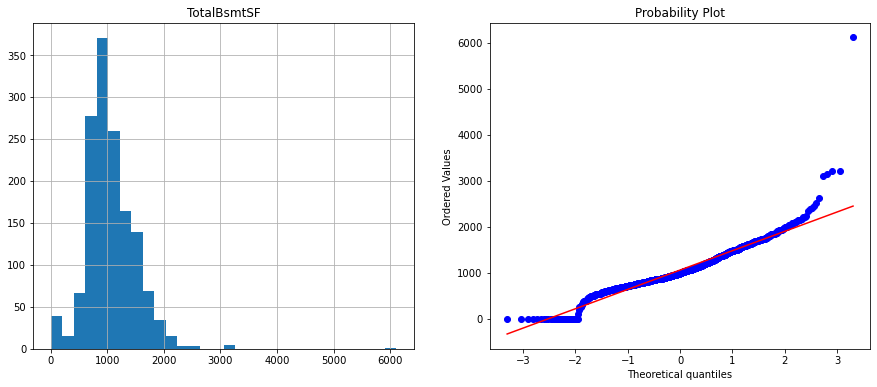

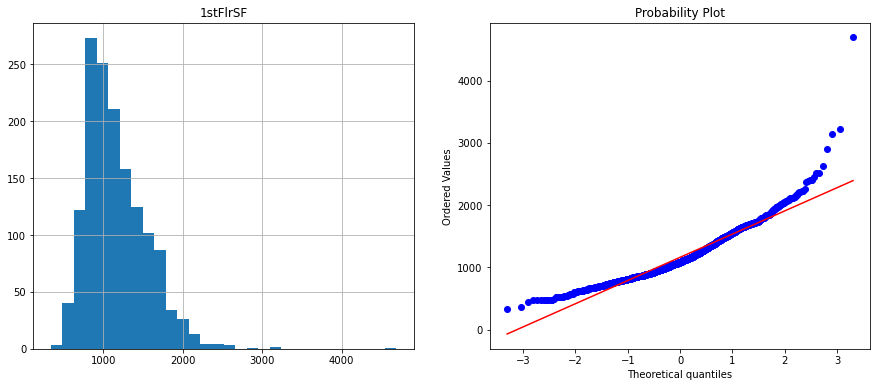

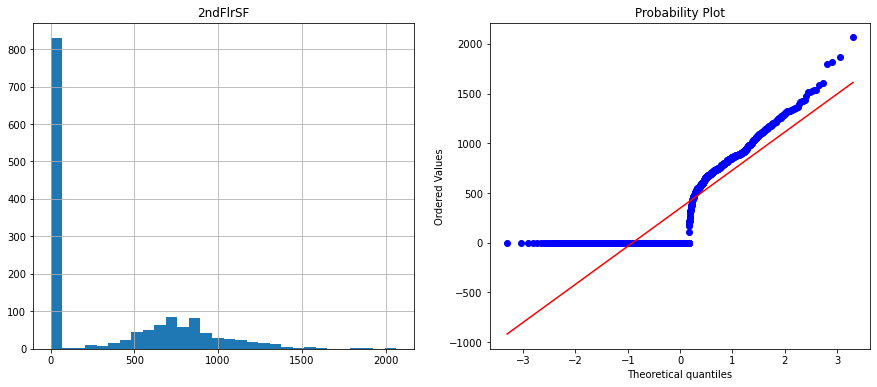

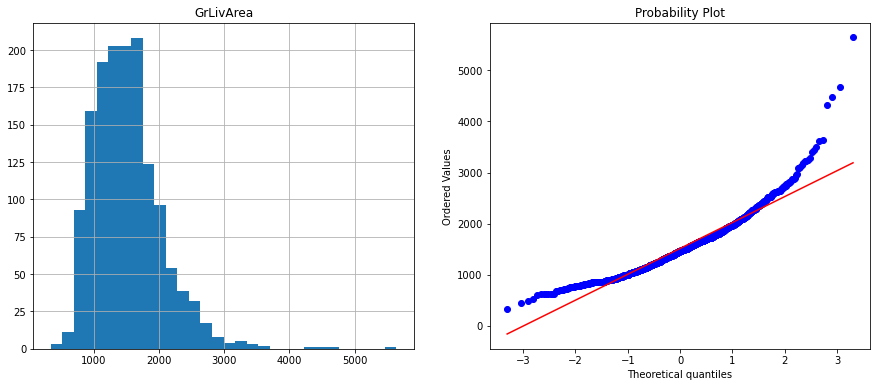

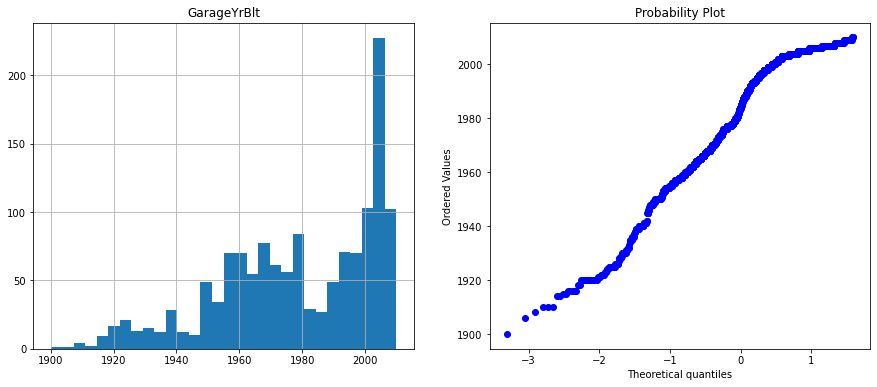

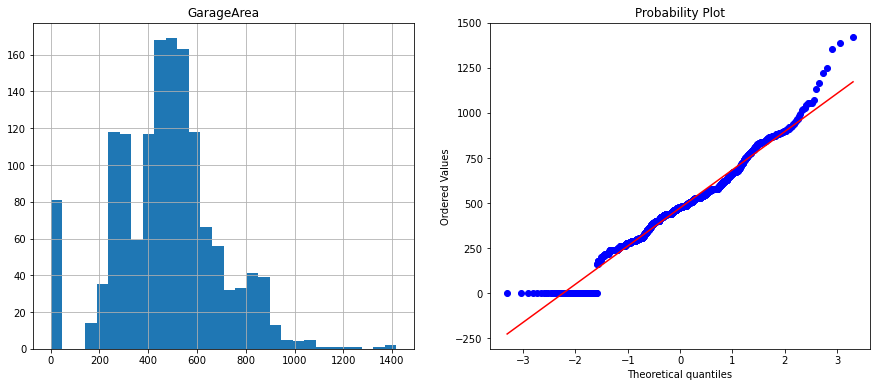

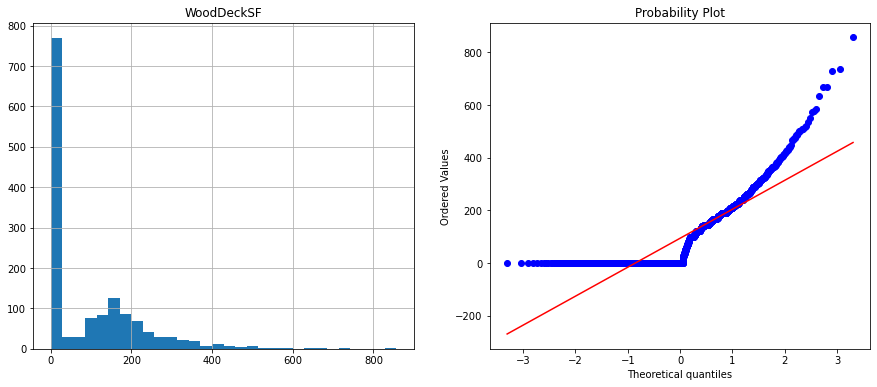

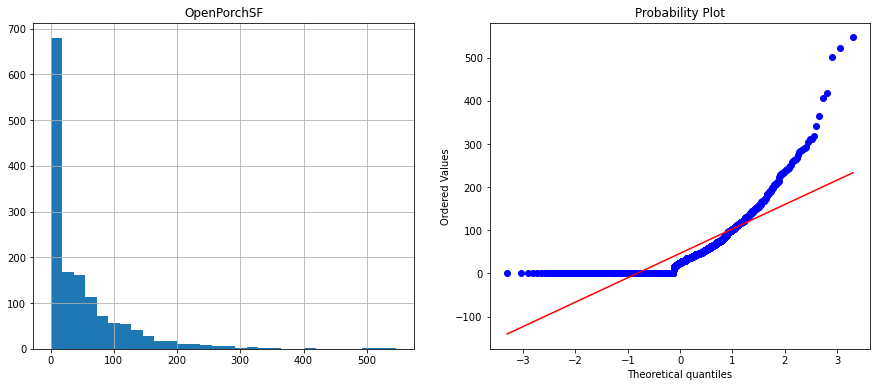

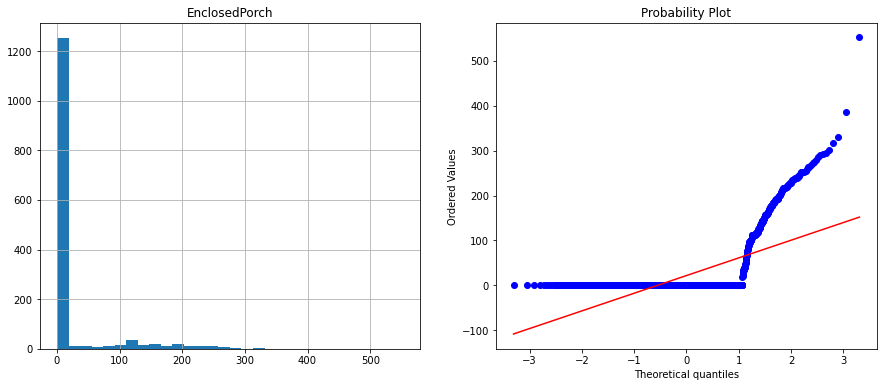

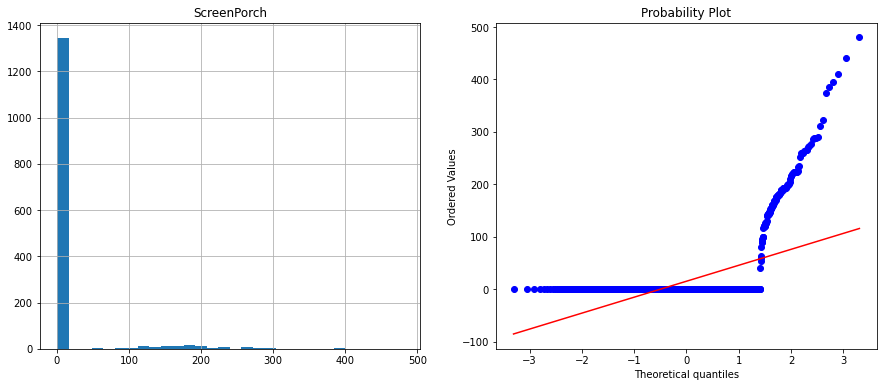

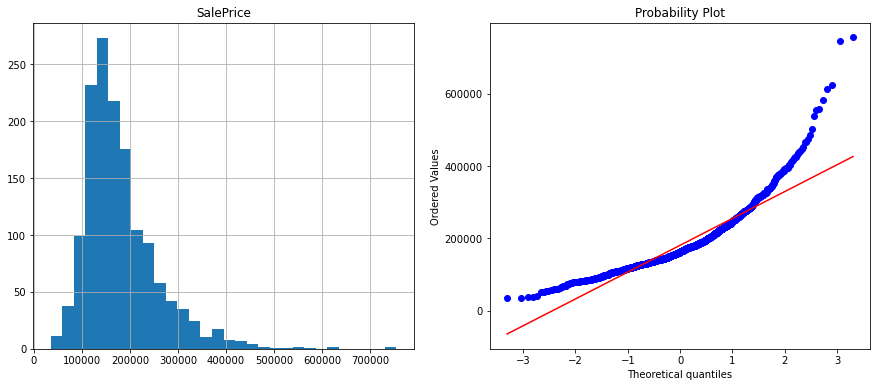

In [261]:
for col in numeric_cont_vars:
    plot_density_variable(dataset, col)

In [262]:
dataset['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

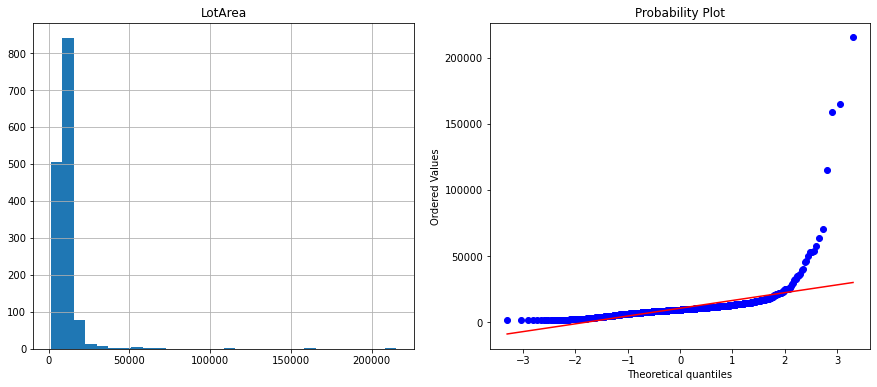

In [263]:
plot_density_variable(dataset,'LotArea')

In [264]:
dataset_temp=dataset.loc[:,['LotArea','SalePrice']]
dataset_temp.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


#### Transformacion logaritmica

In [265]:
dataset_temp['LotArea_Log']=np.log(dataset['LotArea'])

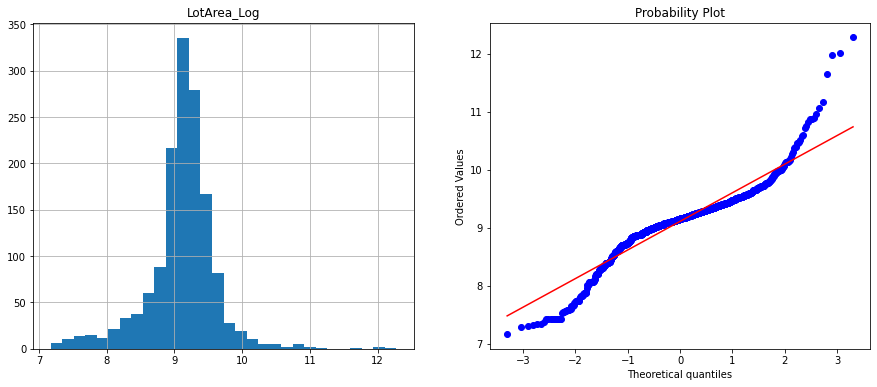

In [266]:
plot_density_variable(dataset_temp,'LotArea_Log')

#### Transformacion inversa

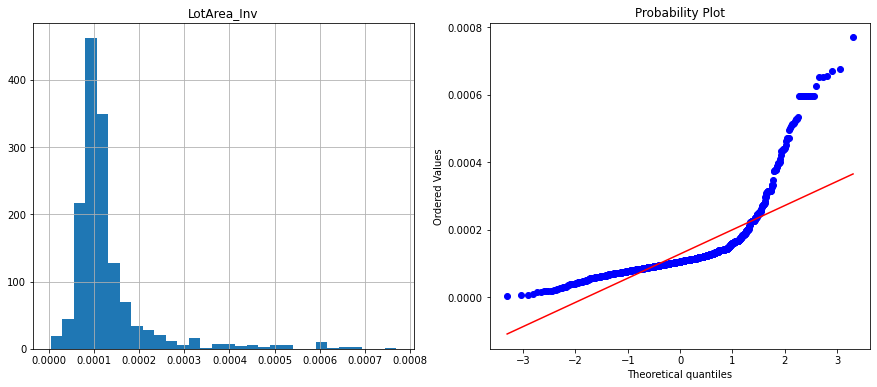

In [267]:
dataset_temp['LotArea_Inv']=(1/dataset['LotArea'])
plot_density_variable(dataset_temp,'LotArea_Inv')

#### Transformacion polinomial de orden 2

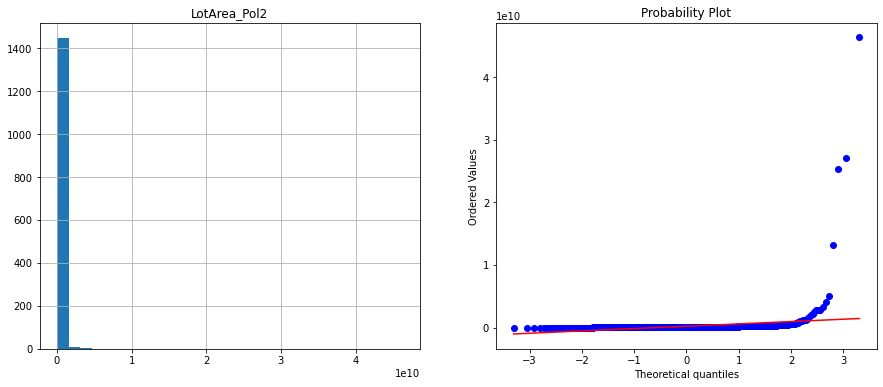

In [268]:
dataset_temp['LotArea_Pol2']=(dataset['LotArea']**2)
plot_density_variable(dataset_temp,'LotArea_Pol2')

#### Transformacion de BoxCox

In [269]:
import scipy.stats as stats

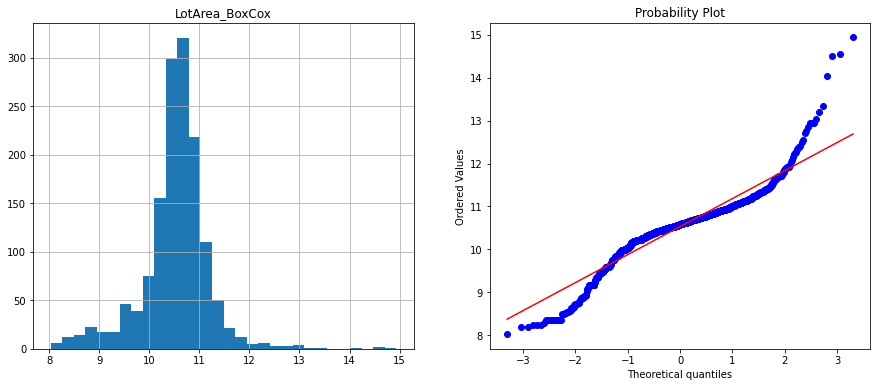

array([[1.        , 0.38951441],
       [0.38951441, 1.        ]])

In [270]:
dataset_temp['LotArea_BoxCox'], lambdaX=stats.boxcox(dataset['LotArea'])
plot_density_variable(dataset_temp,'LotArea_BoxCox')
np.corrcoef(dataset_temp['LotArea_BoxCox'], dataset['SalePrice'])

#### Transformacion YeoJohnson

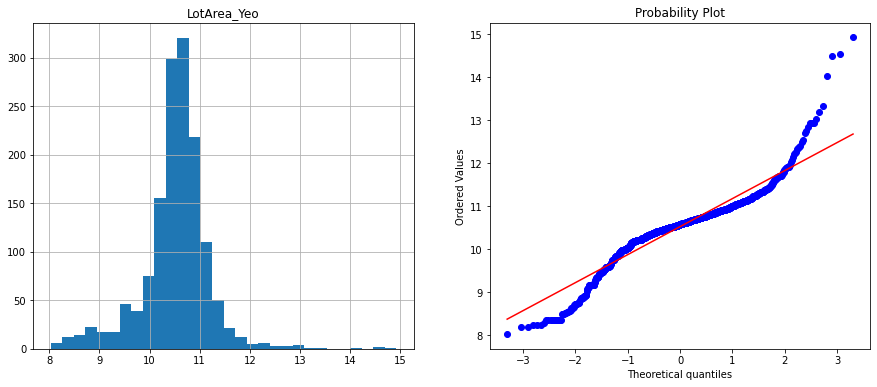

array([[1.        , 0.38951784],
       [0.38951784, 1.        ]])

In [271]:
dataset_temp['LotArea_Yeo'], lambdaX=stats.yeojohnson(dataset['LotArea'])
plot_density_variable(dataset_temp,'LotArea_Yeo')
np.corrcoef(dataset_temp['LotArea_Yeo'], dataset['SalePrice'])

## Outliers

In [272]:
def inspect_outliers(df,variable):
    plt.figure(figsize=(15,6))
    
    plt.subplot(131)
    sns.distplot(df[variable],bins=30)
    plt.title("Densisd-Histogram: "+col)
    
    plt.subplot(132)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.title("QQ-Plot:"+col)
    
    plt.subplot(133)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot:"+col)
    
    plt.show()
    

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


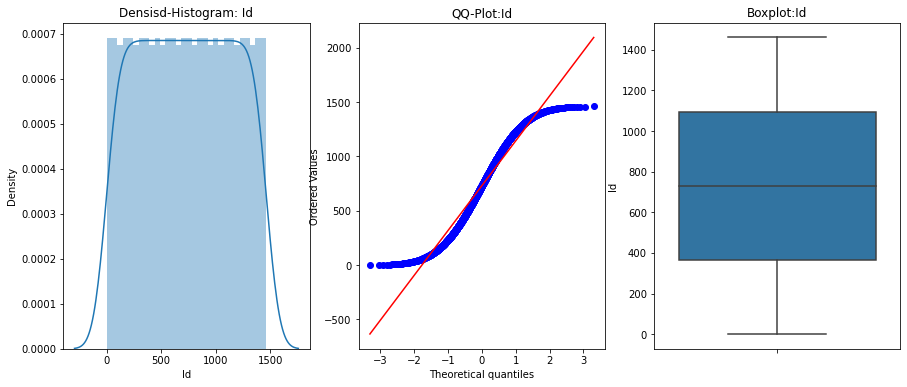

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


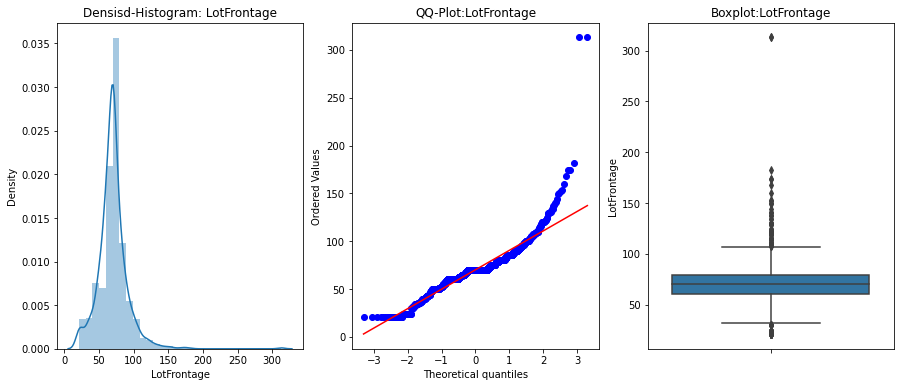

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


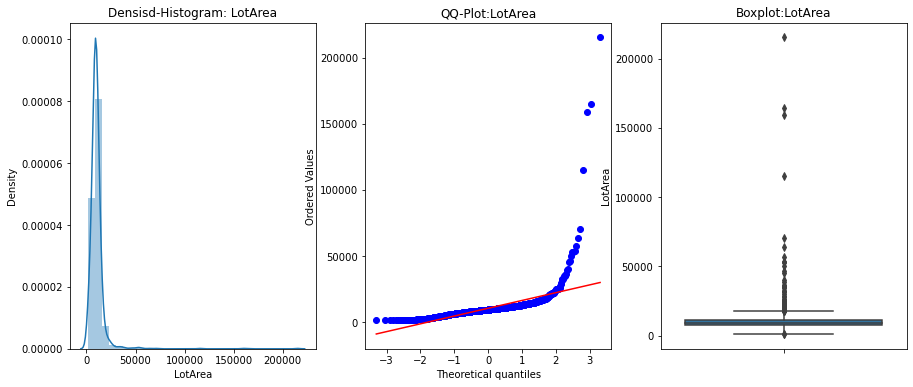

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


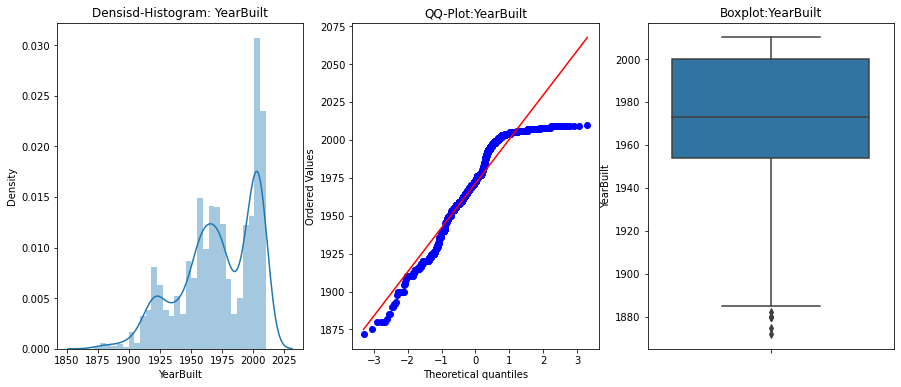

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


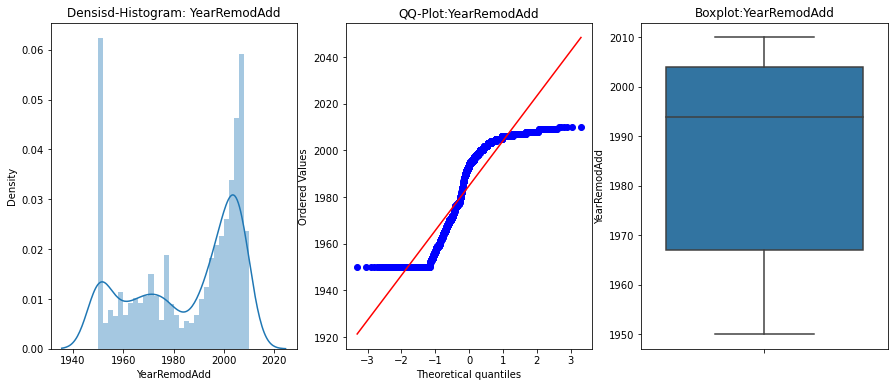

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


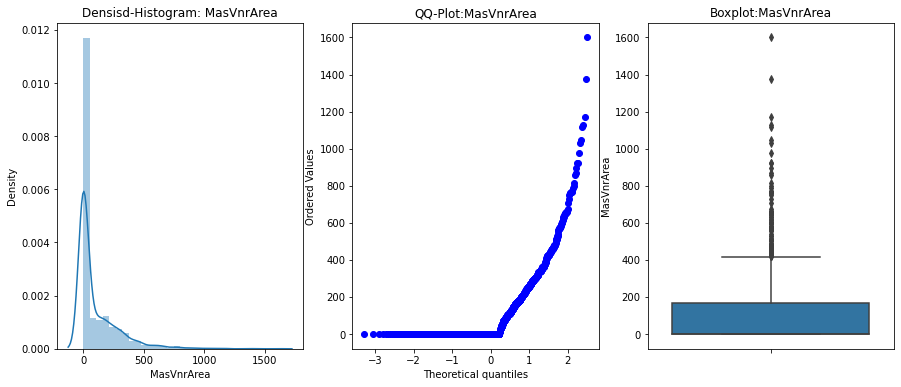

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


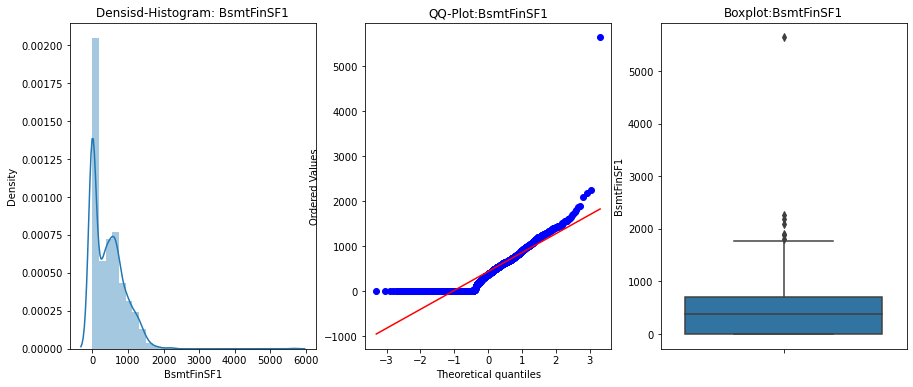

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


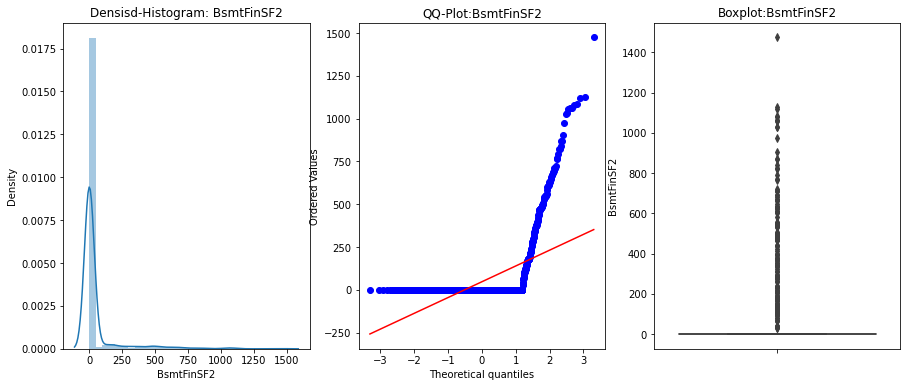

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


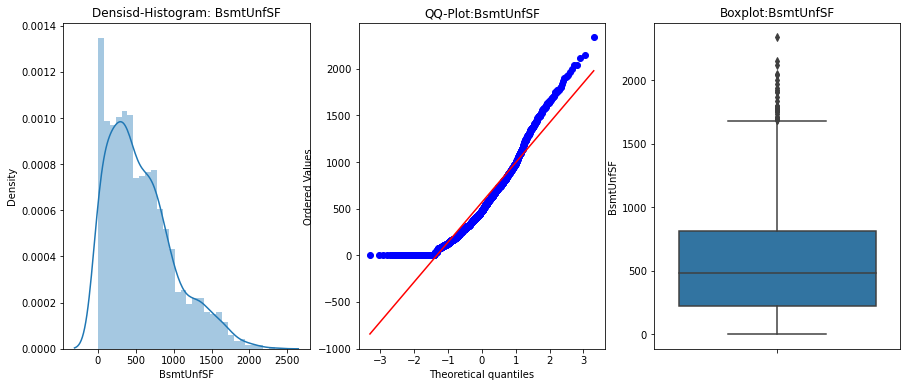

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


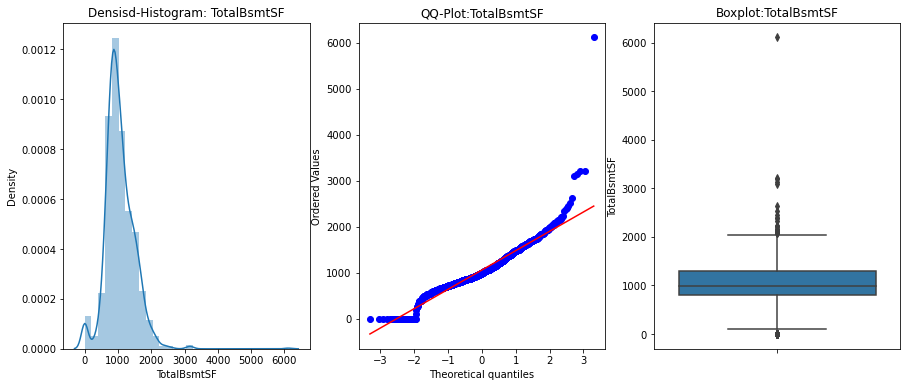

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


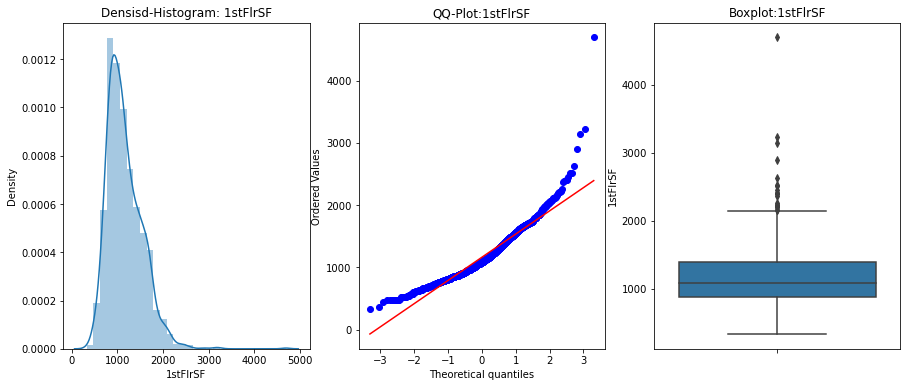

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


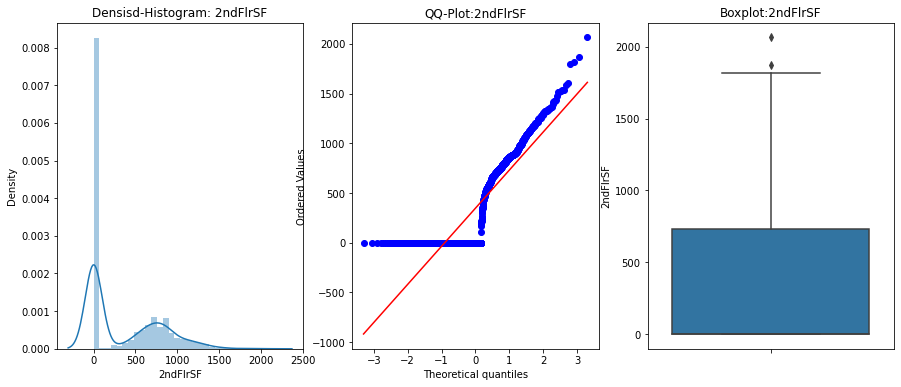

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


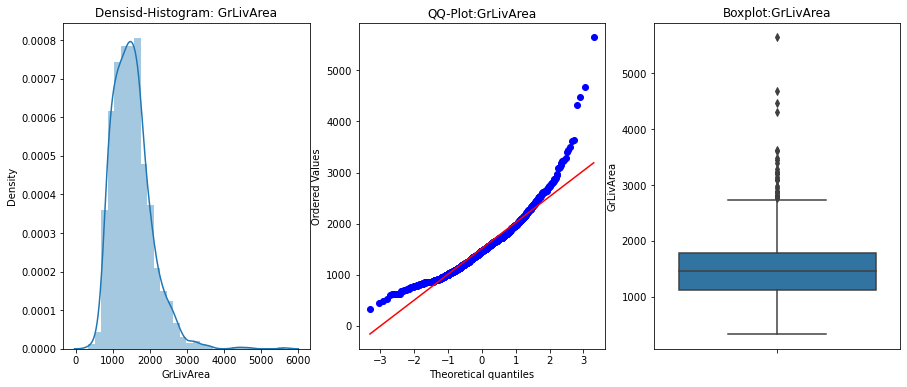

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


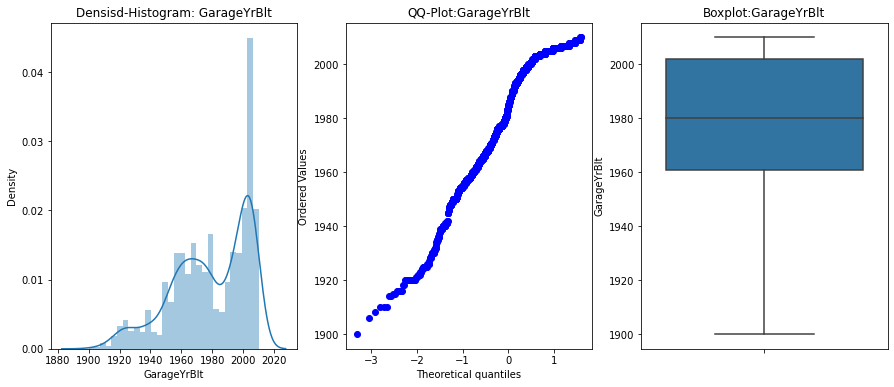

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


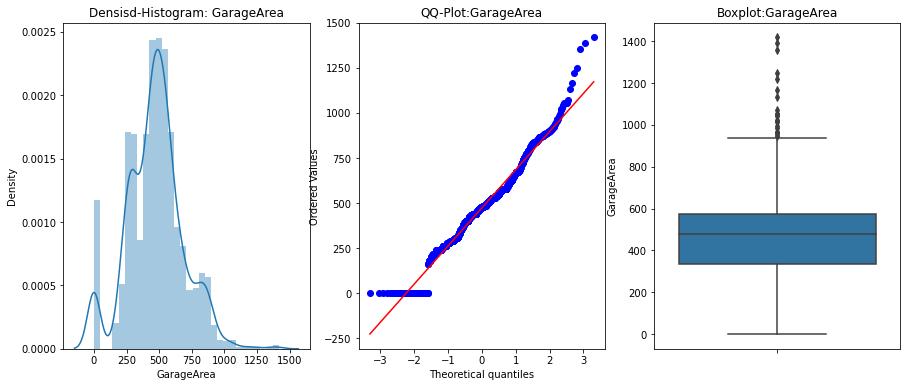

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


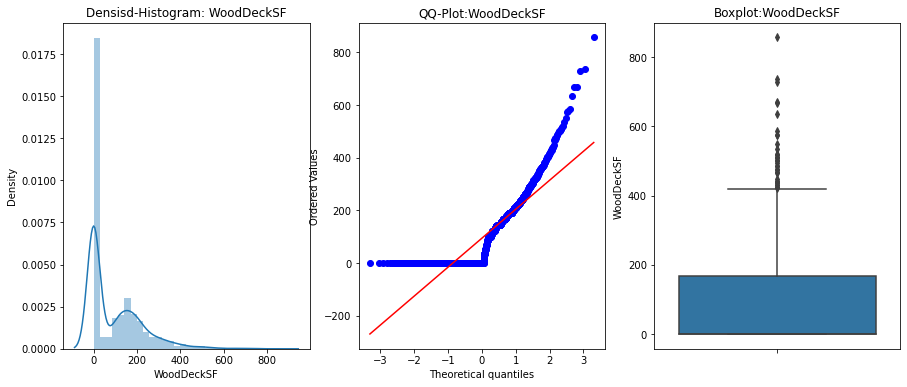

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


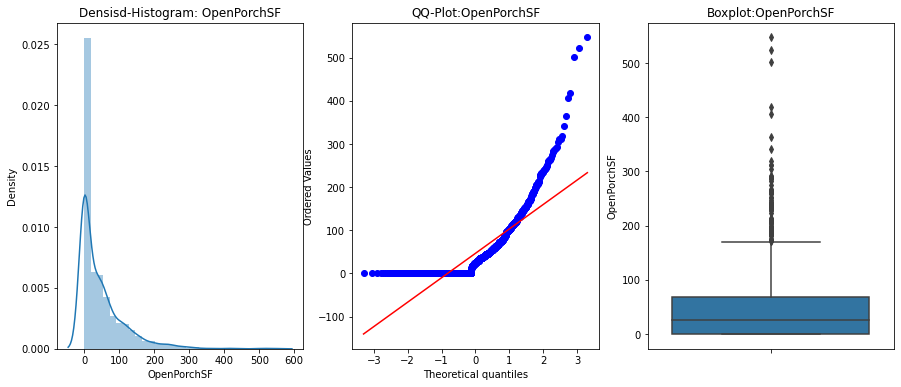

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


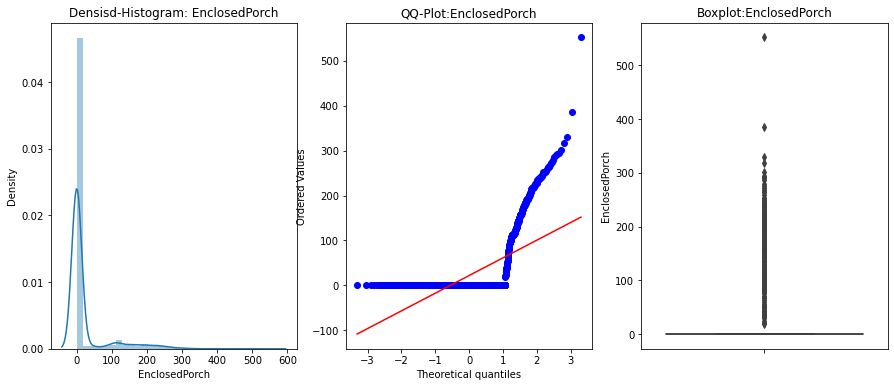

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


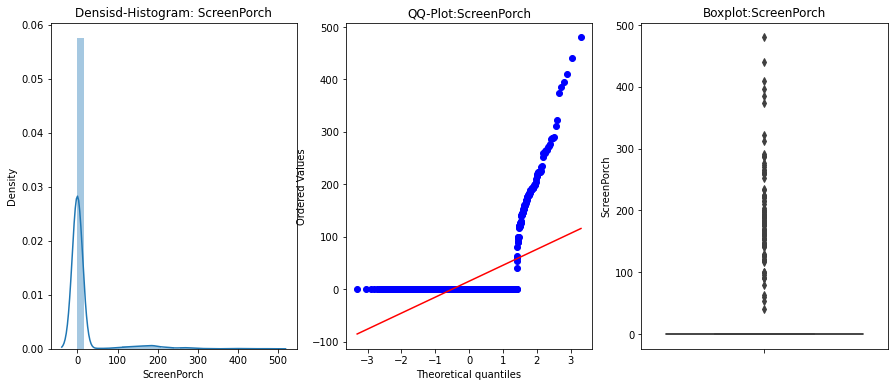

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


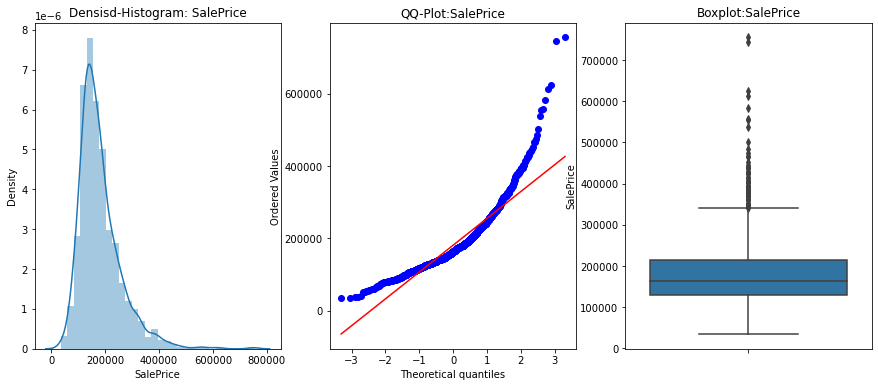

In [273]:
for col in numeric_cont_vars:
    inspect_outliers(dataset,col)

In [274]:
def detect_outliers(df,variable,factor):
    IQR=df[variable].quantile(0.75)-dataset[variable].quantile(0.25)
    LI=df[variable].quantile(0.25)-(IQR*factor)
    LS=df[variable].quantile(0.75)+(IQR*factor)
    return LI,LS

In [275]:
detect_outliers(dataset,'GrLivArea',1.75)

(-3.1875, 2909.4375)

#### Capping

In [276]:
##dataset = pd.read_csv('train_HP.csv')
dataset_temp=dataset

In [277]:
limites=detect_outliers(dataset_temp,'LotFrontage',1.75)
LF_LI, LF_LS=limites

In [278]:
dataset_temp['LotFrontage_cap']=np.where(dataset_temp['LotFrontage']>LF_LS,LF_LS,
                                        np.where(dataset_temp['LotFrontage']<LF_LI,LF_LI, dataset_temp['LotFrontage']))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


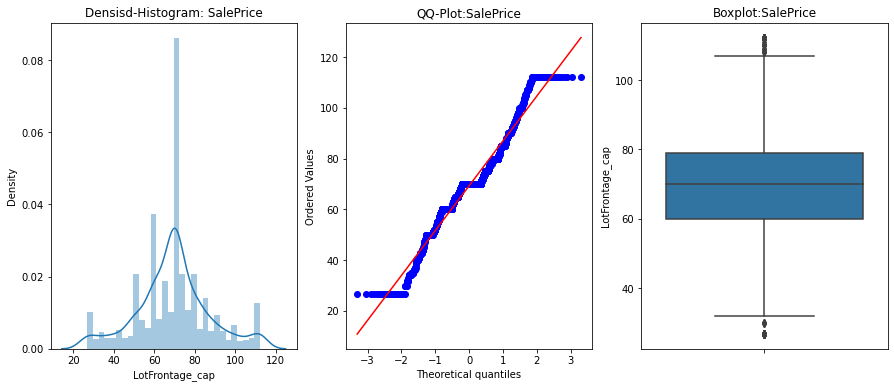

In [279]:
inspect_outliers(dataset_temp,'LotFrontage_cap')

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


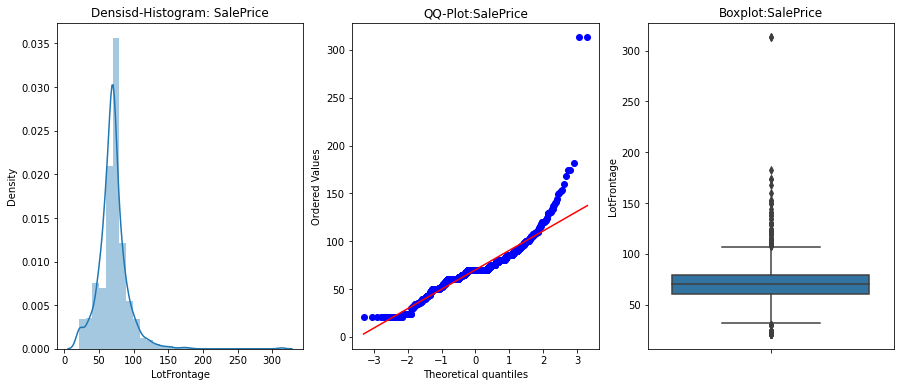

In [280]:
inspect_outliers(dataset_temp,'LotFrontage')

In [281]:
def outlier_treatment(df,variable,factor=1.75):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    LI=df[variable].quantile(0.25)-(IQR*factor)
    LS=df[variable].quantile(0.75)+(IQR*factor)
    
    df[variable]=np.where(df[variable]>LS,LS,
                                        np.where(df[variable]<LI,LI, df[variable]))

In [282]:

for col in numeric_cont_vars:
    outlier_treatment(dataset,col)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


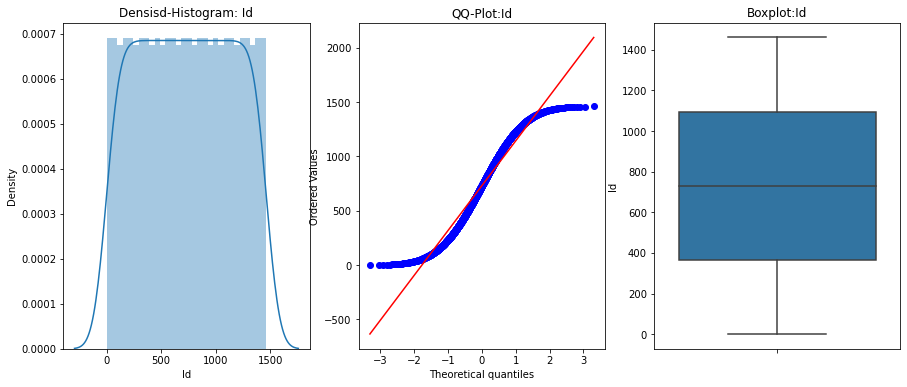

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


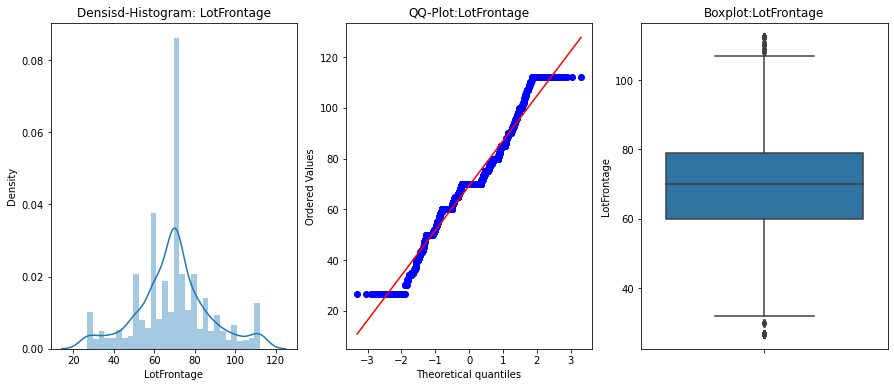

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


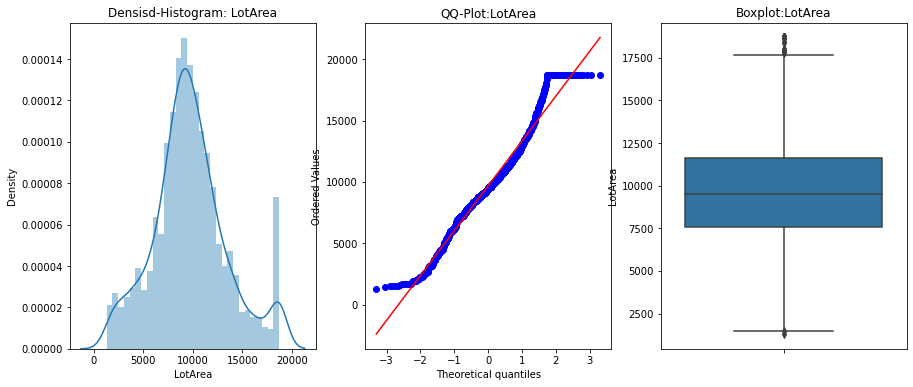

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


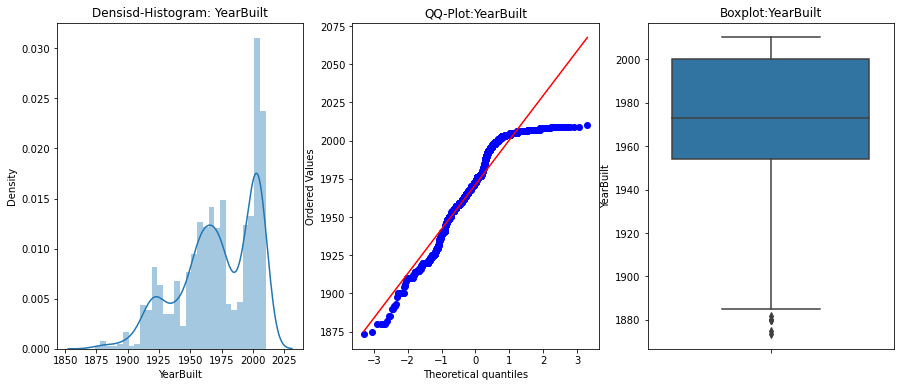

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


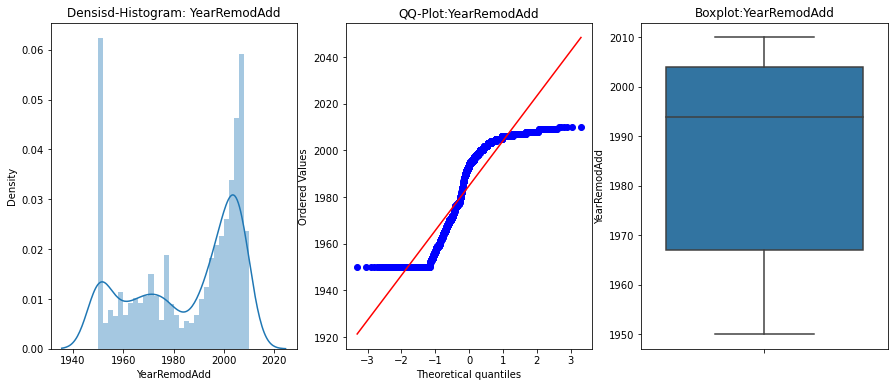

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


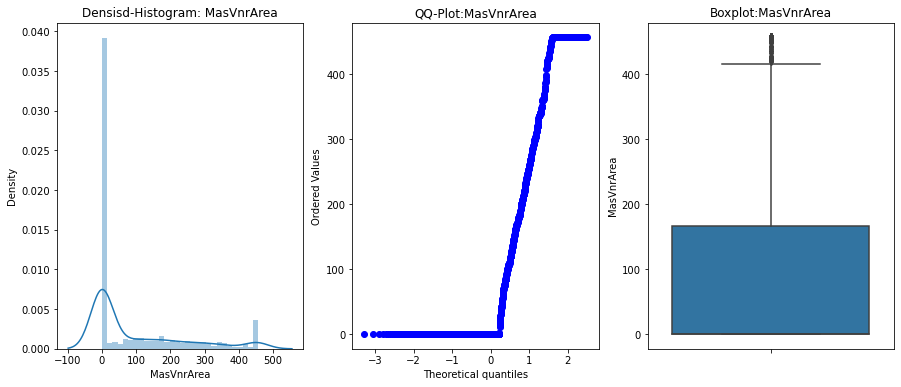

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


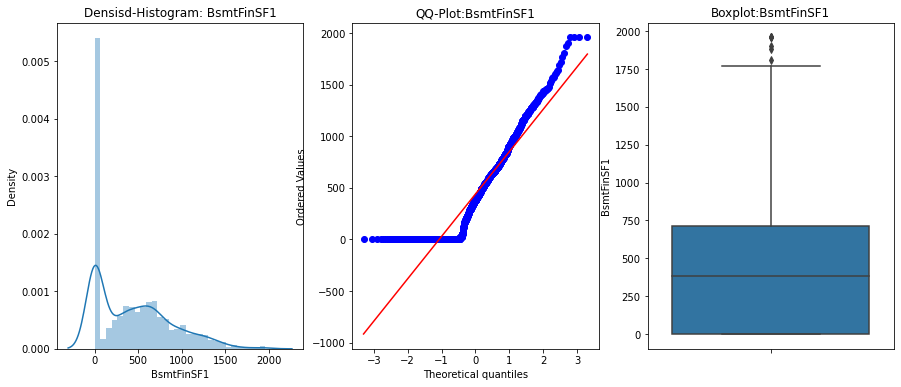

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


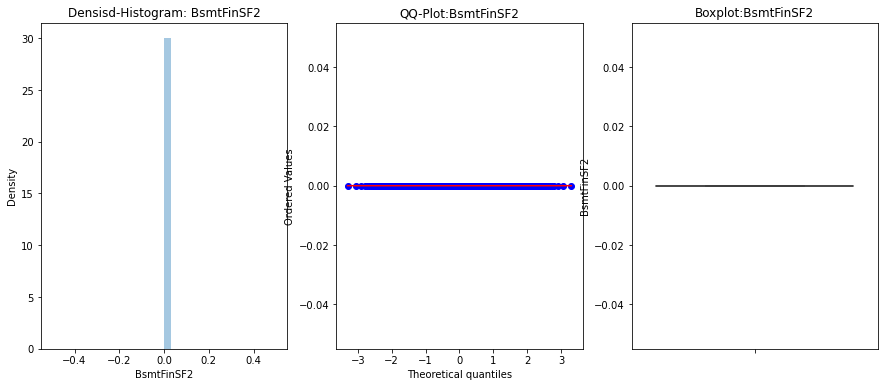

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


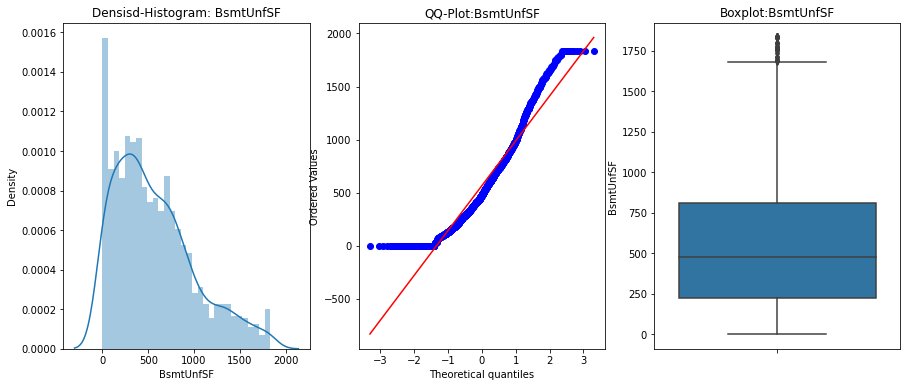

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


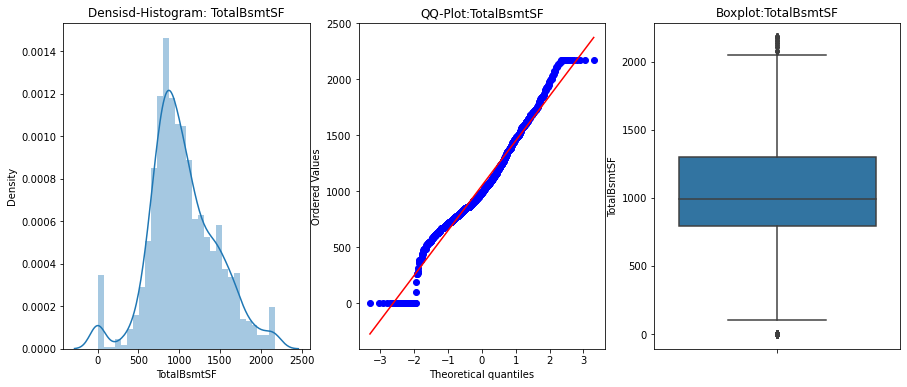

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


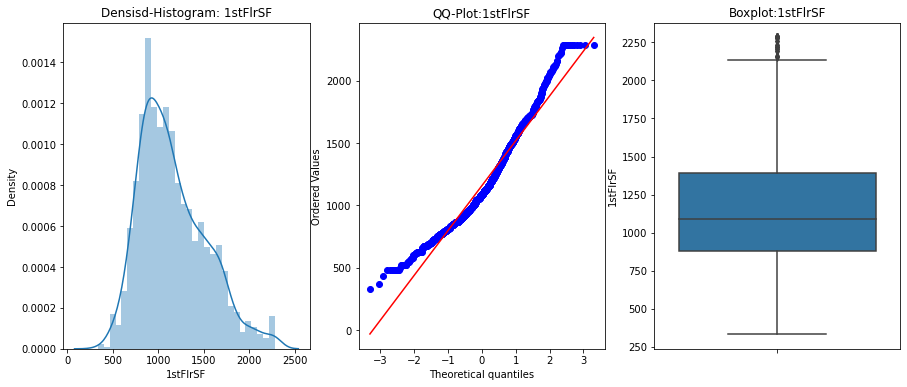

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


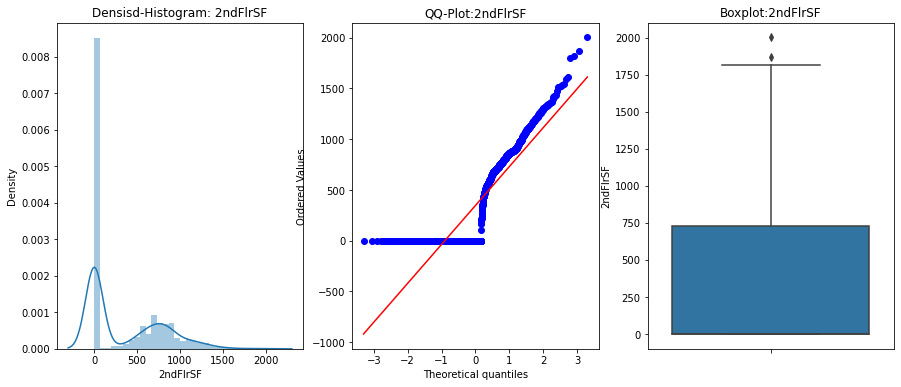

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


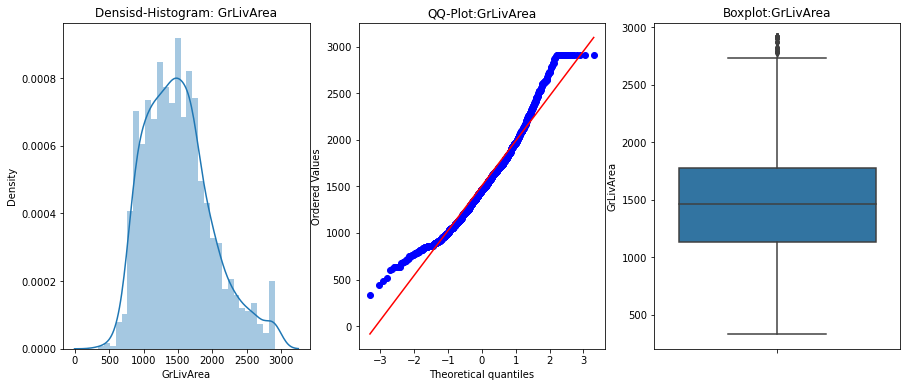

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


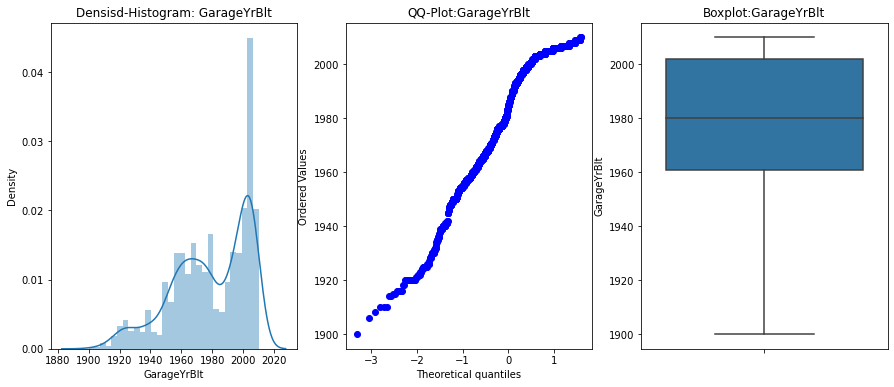

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


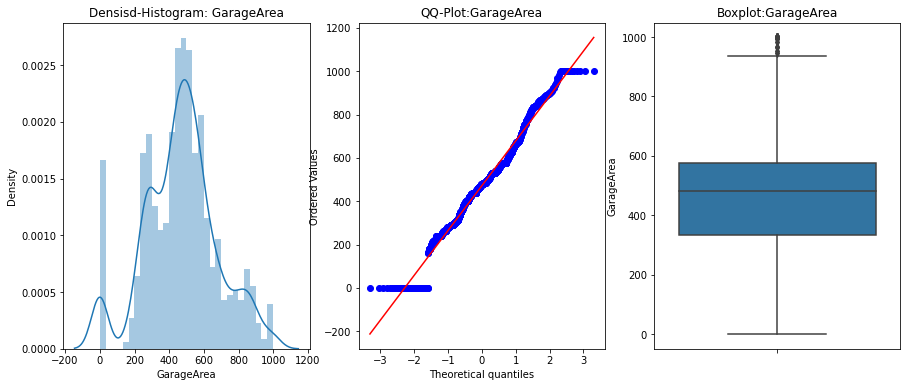

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


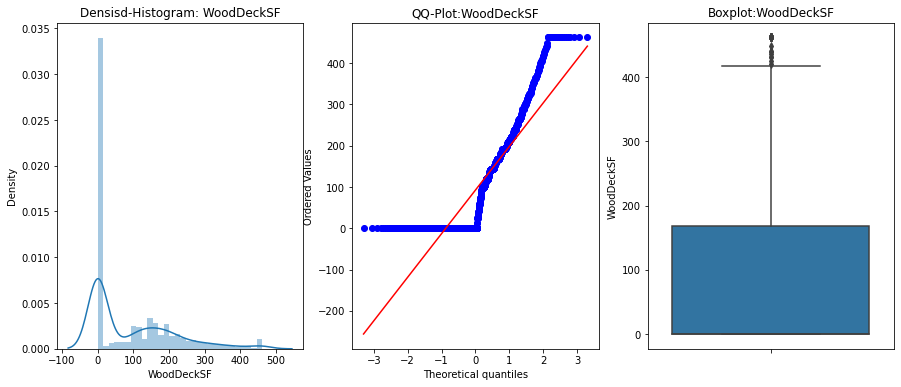

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


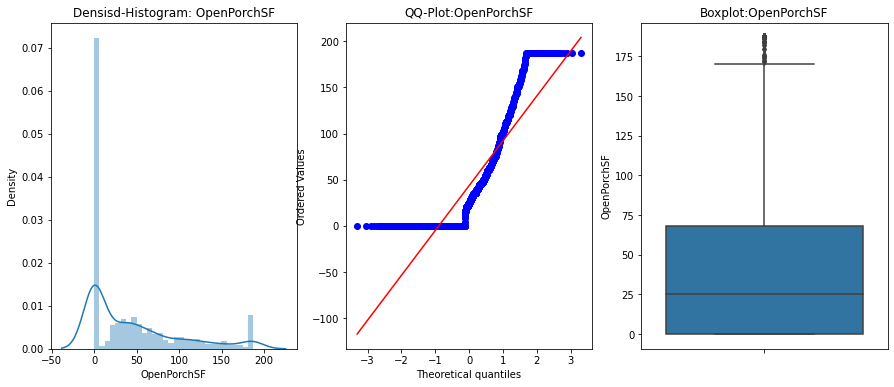

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


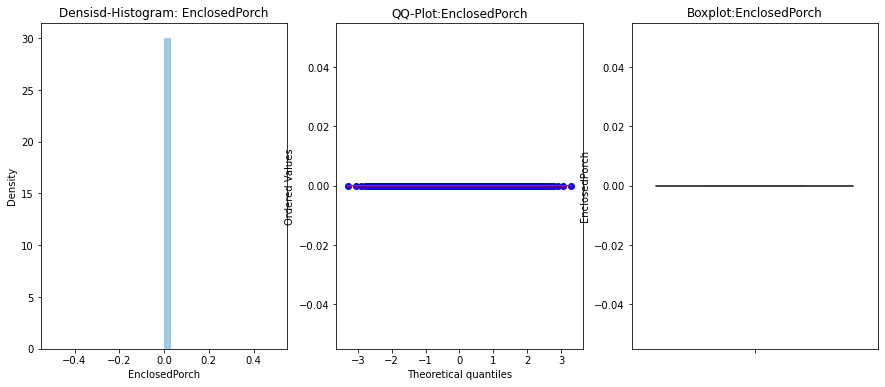

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


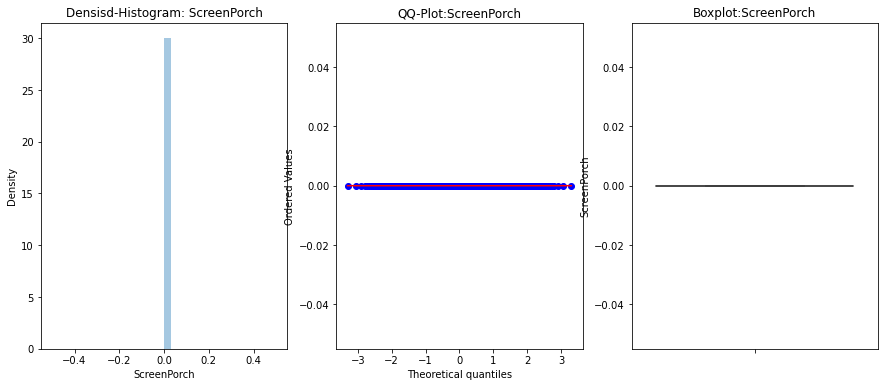

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


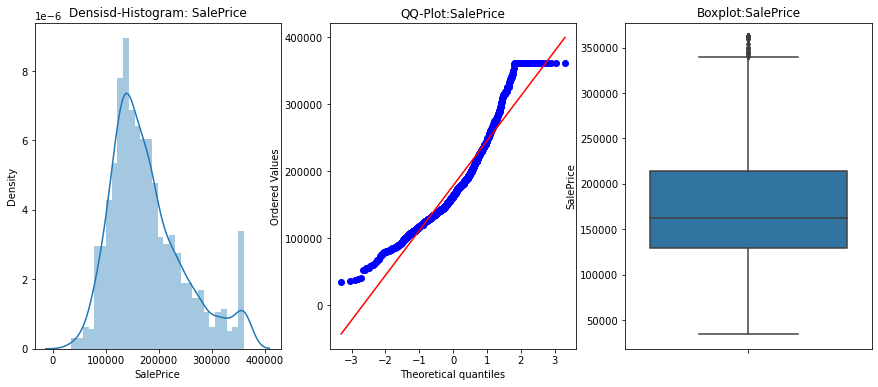

In [283]:
for col in numeric_cont_vars:
    inspect_outliers(dataset,col)

# Feature Scaling

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
dataset_temp=dataset.loc[:,numeric_cont_vars]

In [286]:
dataset_temp.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,1710.0,2003.0,548.0,0.0,61.0,0.0,0.0,208500.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,1976.0,460.0,298.0,0.0,0.0,0.0,181500.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,1786.0,2001.0,608.0,0.0,42.0,0.0,0.0,223500.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,1717.0,1998.0,642.0,0.0,35.0,0.0,0.0,140000.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,2198.0,2000.0,836.0,192.0,84.0,0.0,0.0,250000.0


In [287]:
scaler=StandardScaler()
scaler.fit(dataset_temp) 

StandardScaler()

In [288]:
dataset_temp_scaled=pd.DataFrame(scaler.transform(dataset_temp),columns=dataset_temp.columns)

In [289]:
np.round(dataset_temp_scaled.describe(),2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.0,1460.0,1460.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.0,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.0,0.0,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00
min,-1.73,-2.37,-2.27,-3.24,-1.69,-0.66,-1.01,0.0,-1.30,-2.60,-2.25,-0.80,-2.40,-3.18,-2.26,-0.78,-0.80,0.0,0.0,-2.07
25%,-0.87,-0.52,-0.58,-0.57,-0.87,-0.66,-1.01,0.0,-0.78,-0.63,-0.75,-0.80,-0.77,-0.71,-0.66,-0.78,-0.80,0.0,0.0,-0.70
50%,0.00,0.04,-0.06,0.06,0.44,-0.66,-0.13,0.0,-0.20,-0.15,-0.19,-0.80,-0.09,0.06,0.04,-0.78,-0.34,0.0,0.0,-0.22
75%,0.87,0.54,0.52,0.95,0.93,0.52,0.62,0.0,0.55,0.61,0.64,0.87,0.55,0.95,0.50,0.63,0.45,0.0,0.0,0.52
max,1.73,2.40,2.43,1.28,1.22,2.58,3.49,0.0,2.90,2.78,3.07,3.79,2.87,1.28,2.52,3.11,2.63,0.0,0.0,2.64


In [292]:
dataset.loc[:,numeric_cont_vars]=dataset_temp_scaled

In [293]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_cap
0,-1.730865,60,1151.0,-0.239206,-0.335801,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,0.438857,65.0
1,-1.728492,20,1151.0,0.597132,-0.024548,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,0.048698,80.0
2,-1.726120,60,1151.0,-0.071938,0.422033,1454.0,NaN,484.0,1311.0,1459.0,...,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,0.655612,68.0
3,-1.723747,70,1151.0,-0.517985,-0.038080,1454.0,NaN,484.0,1311.0,1459.0,...,NaN,NaN,NaN,0,2,2006,1267.0,101.0,-0.550990,60.0
4,-1.721374,60,1151.0,0.820156,1.236704,1454.0,NaN,484.0,1311.0,1459.0,...,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,1.038546,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,60,1151.0,-0.406474,-0.480060,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,-0.045229,62.0
1456,1.723747,20,1151.0,0.875912,0.943044,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,0.460533,85.0
1457,1.726120,70,1151.0,-0.183450,-0.175573,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,1.276977,66.0
1458,1.728492,20,1151.0,-0.071938,0.007119,1454.0,NaN,925.0,1311.0,1459.0,...,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,-0.520283,68.0


In [296]:
dataset.to_csv(r'HousePrice')